# Popular Data Science Questions

In this project, we will explore what people want to learn most in data science.
[Data Science Stack Exchange](https://datascience.stackexchange.com/) (DSSE) is a data science dedicated website that will help us in our investigation.

Each post on DSSE has from 1 to 5 tags. That will be very useful in categorizing content.

Stack Exchange provides a public data base for each of its websites. [Here](https://data.stackexchange.com/datascience/query/new) is a link to query and explore Data Science Stack Exchange's database.

The `posts` table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

-`Id`: An identification number for the post.
- `PostTypeId`: An identification number for the type of post.
- `CreationDate`: The date and time of creation of the post.
- `Score`: The post's score.
- `ViewCount`: How many times the post was viewed.
- `Tags`: What tags were used.
- `AnswerCount`: How many answers the question got (only applicable to question posts).
- `FavoriteCount`: How many times the question was favored (only applicable to question posts).

There are 8 types of posts but only two with high volume:
1. Question
2. Answer

For our purpose, we will just focus on the question posts and limit our analysis to the posts of 2019 and the beginning of 2020.

## Opening and Exploring the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

questions = pd.read_csv('questions.csv')
questions.head()

,ID,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,62775,2019-11-06 16:02:42,0,31,<machine-learning><lstm><recurrent-neural-net>...,0,NaN
1,62776,2019-11-06 16:07:20,2,632,<python><matplotlib>,0,NaN
2,62777,2019-11-06 16:26:56,0,11,<r>,0,NaN
3,62780,2019-11-06 17:02:32,1,52,<machine-learning><nlp><word2vec><word-embeddi...,1,NaN
4,62783,2019-11-06 17:47:32,0,33,<multiclass-classification><missing-data><pysp...,0,NaN


In [2]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10679 entries, 0 to 10678
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10679 non-null  int64  
 1   CreationDate   10679 non-null  object 
 2   Score          10679 non-null  int64  
 3   ViewCount      10679 non-null  int64  
 4   Tags           10679 non-null  object 
 5   AnswerCount    10679 non-null  int64  
 6   FavoriteCount  1686 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 584.1+ KB


In [3]:
questions['FavoriteCount'].value_counts(dropna=False)

NaN     8993
1.0     1136
2.0      249
0.0      196
3.0       56
4.0       21
6.0        9
5.0        7
7.0        6
9.0        2
8.0        1
10.0       1
16.0       1
12.0       1
Name: FavoriteCount, dtype: int64

In [4]:
questions.describe()

,ID,Score,ViewCount,AnswerCount,FavoriteCount
count,10679.000000,10679.000000,10679.000000,10679.000000,1686.000000
mean,57573.905515,0.958423,217.603708,0.812248,1.234282
std,7785.775975,1.526121,1107.134601,0.864730,1.068141
min,43363.000000,-3.000000,2.000000,0.000000,0.000000
25%,51533.000000,0.000000,23.000000,0.000000,1.000000
50%,57415.000000,1.000000,42.000000,1.000000,1.000000
75%,64446.000000,1.000000,112.000000,1.000000,1.000000
max,71391.000000,45.000000,58078.000000,10.000000,16.000000


## Data Cleaning
The dataset looks quite clean, except for few details:
- As we can see, almost 85% of values in `FavoriteCount` column is missing but the missing value just means that the question wasn't tagged as favorite by any user. So we can replace missing values with 0s.
- Another problem is incosistent data types of 2 columns: `CreationDate` and `FavoriteCount`.
- And finally, we will change the format of the `Tags` column.

In [5]:
questions['FavoriteCount'].fillna(0, inplace=True)
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)

In [6]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10679 entries, 0 to 10678
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             10679 non-null  int64         
 1   CreationDate   10679 non-null  datetime64[ns]
 2   Score          10679 non-null  int64         
 3   ViewCount      10679 non-null  int64         
 4   Tags           10679 non-null  object        
 5   AnswerCount    10679 non-null  int64         
 6   FavoriteCount  10679 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 542.4+ KB


In [7]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
print(questions['Tags'][:5])

0    [machine-learning, lstm, recurrent-neural-net,...
1                                 [python, matplotlib]
2                                                  [r]
3    [machine-learning, nlp, word2vec, word-embeddi...
4    [multiclass-classification, missing-data, pysp...
Name: Tags, dtype: object


## Most Used and Most Viewed
We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

In [8]:
tags_count = {}

for tag_list in questions['Tags']:
    for tag in tag_list:
        if tag in tags_count:
            tags_count[tag] += 1
        else:
            tags_count[tag] = 1

In [9]:
tags_df = pd.DataFrame.from_dict(tags_count, orient='index')
tags_df = tags_df.rename(columns={0: 'Count'}).sort_values('Count', ascending=False)

most_used = tags_df.head(15)
most_used

,Count
machine-learning,3274
python,2181
deep-learning,1441
neural-network,1240
keras,1097
classification,811
tensorflow,712
scikit-learn,655
nlp,630
cnn,574


In [10]:
views_dict = {}

for index, row in questions.iterrows():
    tags = row[4]
    views = row[3]
    for tag in tags:
        if tag in views_dict:
            views_dict[tag] += views
        else:
            views_dict[tag] = views

In [11]:
views_df = pd.DataFrame.from_dict(views_dict, orient="index")
views_df = views_df.rename(columns={0: "Views"}).sort_values('Views', ascending=False)

most_viewed = views_df.head(15)
most_viewed

,Views
python,837262
machine-learning,579657
keras,395238
pandas,346039
deep-learning,338926
neural-network,274522
scikit-learn,196450
tensorflow,189872
classification,152524
dataframe,140000


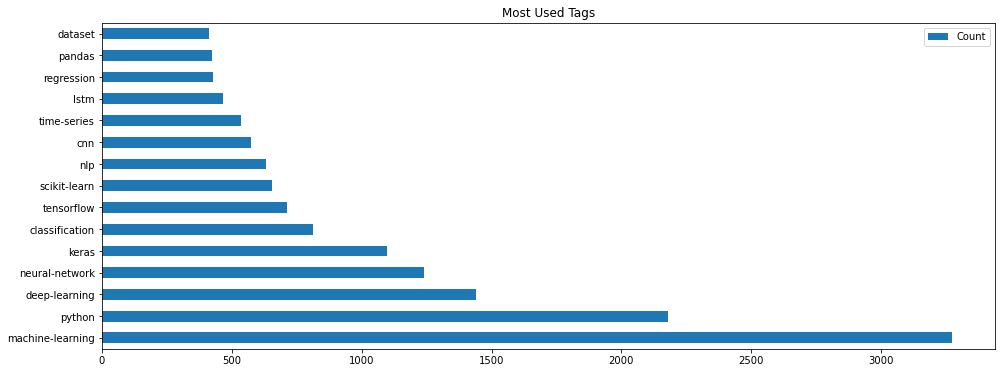

In [12]:
most_used.plot(kind='barh', title='Most Used Tags', figsize=(16,6));

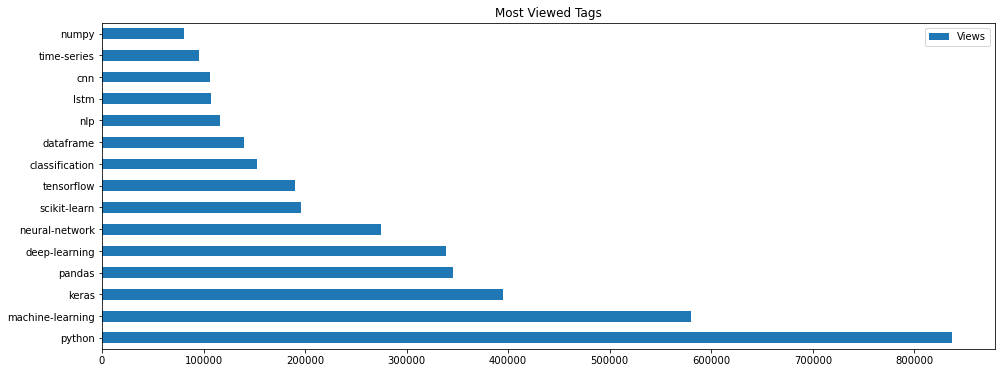

In [13]:
most_viewed.plot(kind='barh', title='Most Viewed Tags', figsize=(16,6));

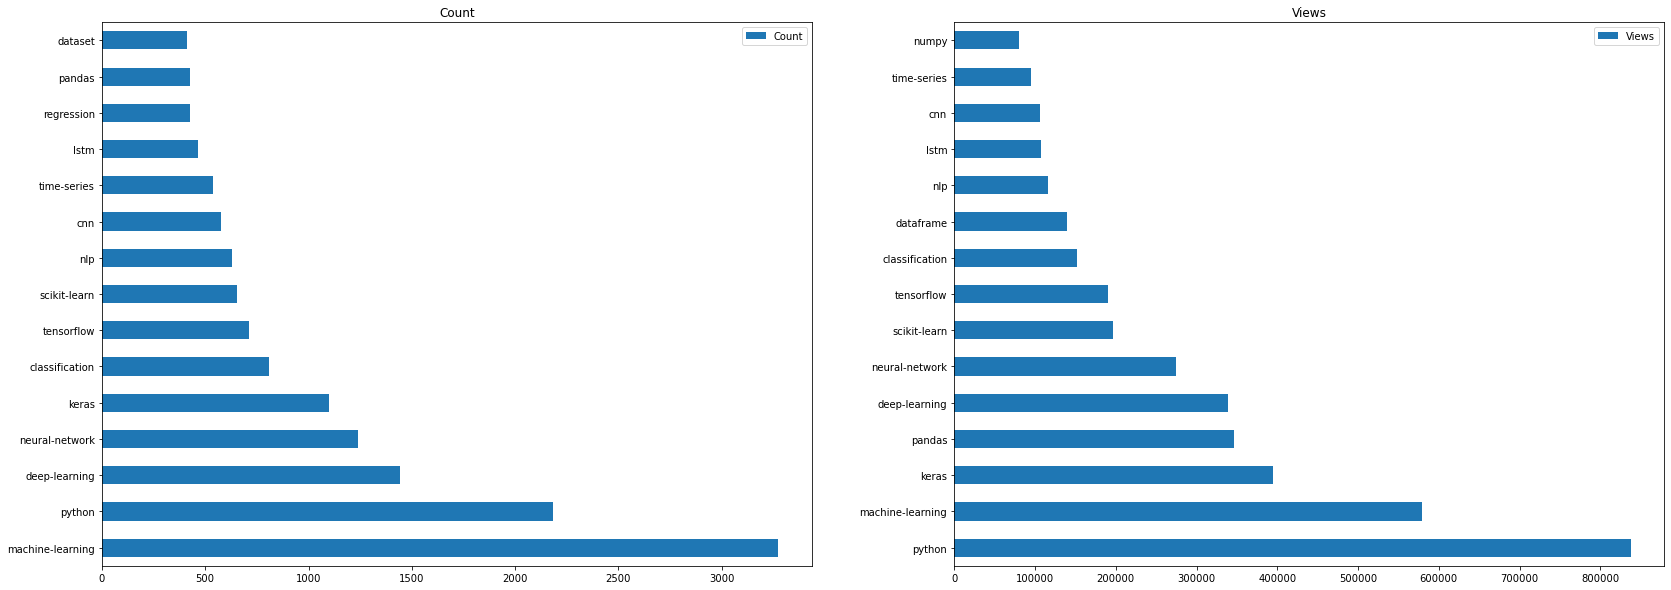

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((28, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True);

Most top tags are present in both dataframes.
Let's see what tags are in `most_used`, but not in `most_viewed`. And vice versa.

In [14]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count,Views
machine-learning,3274,579657.0
python,2181,837262.0
deep-learning,1441,338926.0
neural-network,1240,274522.0
keras,1097,395238.0
classification,811,152524.0
tensorflow,712,189872.0
scikit-learn,655,196450.0
nlp,630,115756.0
cnn,574,106630.0


In [15]:
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
in_viewed

,Count,Views
python,2181.0,837262
machine-learning,3274.0,579657
keras,1097.0,395238
pandas,424.0,346039
deep-learning,1441.0,338926
neural-network,1240.0,274522
scikit-learn,655.0,196450
tensorflow,712.0,189872
classification,811.0,152524
dataframe,NaN,140000


The tags present in `most_used` and not in `most_viewed` are:
- regression
- dataset

And the tags present in `most_viewed` and not in `most_used` are:
- dataframe
- numpy

## Relation between Tags
Some tags stand out as being related. For example, `python` is related to `pandas` because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags. Other pairs of tags, shouldn't be related at all, like `pandas` and `r`:

In [21]:
questions[questions["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)
]

,ID,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
1128,60074,2019-09-11 20:35:17,0,44,"[r, pandas, dplyr]",0,0
7867,49148,2019-04-11 19:41:39,1,95,"[r, data-mining, pandas, matlab, databases]",3,0


## Conclusions
You may have noticed that the most used tags are also the most viewed. From the top 10 tags of each, here's a list of the tags in common: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn.

Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.